In [1]:
import numpy as np
import pandas as pd
import mne
from mne.datasets import somato
from scipy.fftpack import fft, ifft
from scipy.io import savemat

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pyedflib

In [4]:
import hctsa

In [5]:
from mne import Epochs
from mne.decoding import SSD

In [6]:
import pycatch22

In [7]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (
    sample_data_folder / "MEG" / "sample" / r"C:\Users\avant\Downloads\test_eeg.edf")
raw = mne.io.read_raw(sample_data_raw_file)
raw.load_data()

Extracting EDF parameters from C:\Users\avant\Downloads\test_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 117354999  =      0.000 ... 234709.998 secs...


<RawEDF | test_eeg.edf, 3 x 117355000 (234710.0 s), ~2.62 GB, data loaded>

In [8]:
print(raw)
print(raw.info)

<RawEDF | test_eeg.edf, 3 x 117355000 (234710.0 s), ~2.62 GB, data loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: Activity, EEG, EMG
 chs: 3 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2020-09-13 17:10:28 UTC
 nchan: 3
 projs: []
 sfreq: 500.0 Hz
>


In [9]:
raw.info['bads'] = ['Activity', 'EMG']

In [10]:
selection = mne.read_vectorview_selection('EEG')
picks = mne.pick_types(raw.info, meg='mag', eeg=False, eog=False,
                       stim=False, exclude='bads', selection=selection)

Effective window size : 4.096 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\avant\AppData\Local\Temp\ipykernel_15280\2728020678.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=250).plot(picks='EEG', exclude='bads')
C:\Users\avant\anaconda3\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


Using matplotlib as 2D backend.


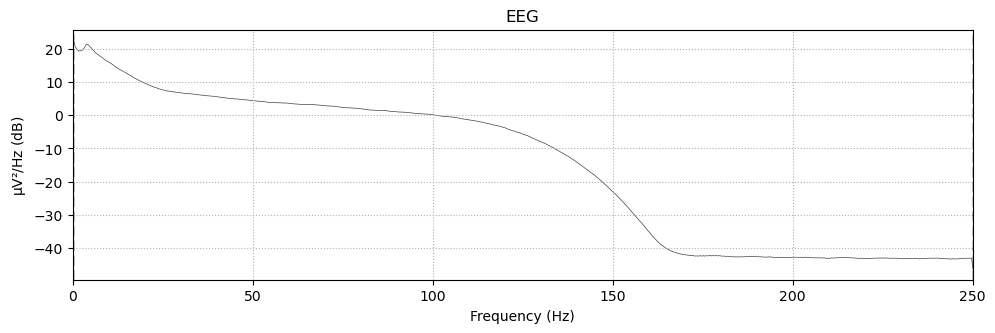

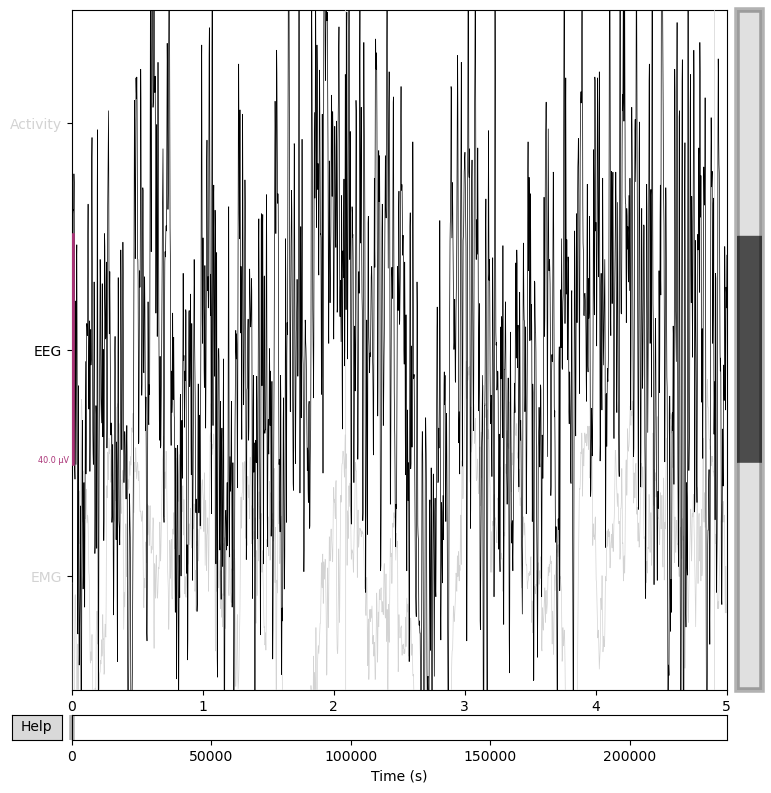

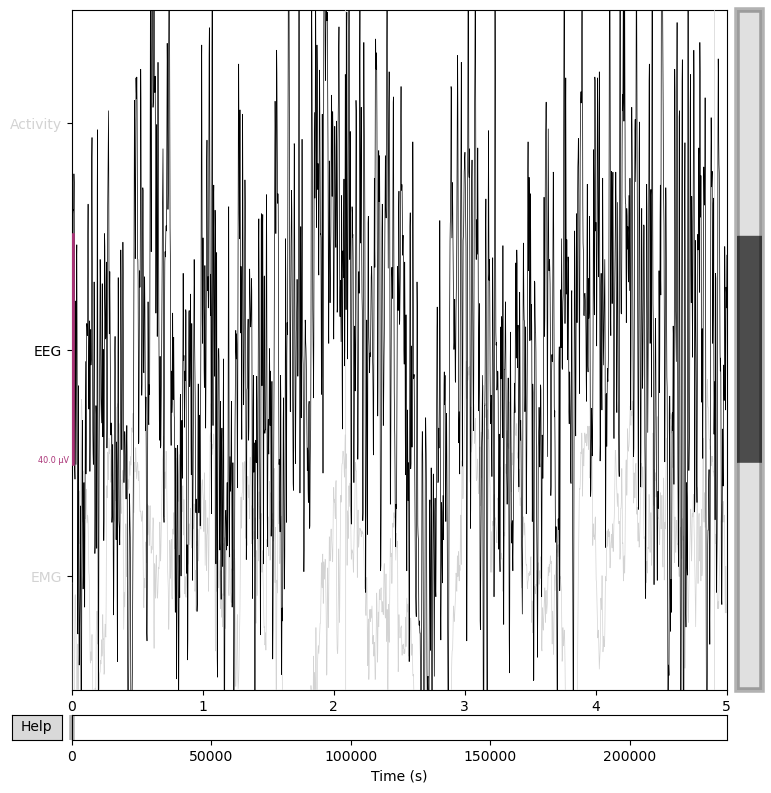

In [11]:
raw.compute_psd(fmax=250).plot(picks='EEG', exclude='bads')
raw.plot(duration=5, n_channels=3)

In [12]:
# Filter settings
low_cut = 0.1
hi_cut  = 50

raw_filt = raw.copy().filter(low_cut, hi_cut)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 16501 samples (33.002 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   48.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min finished


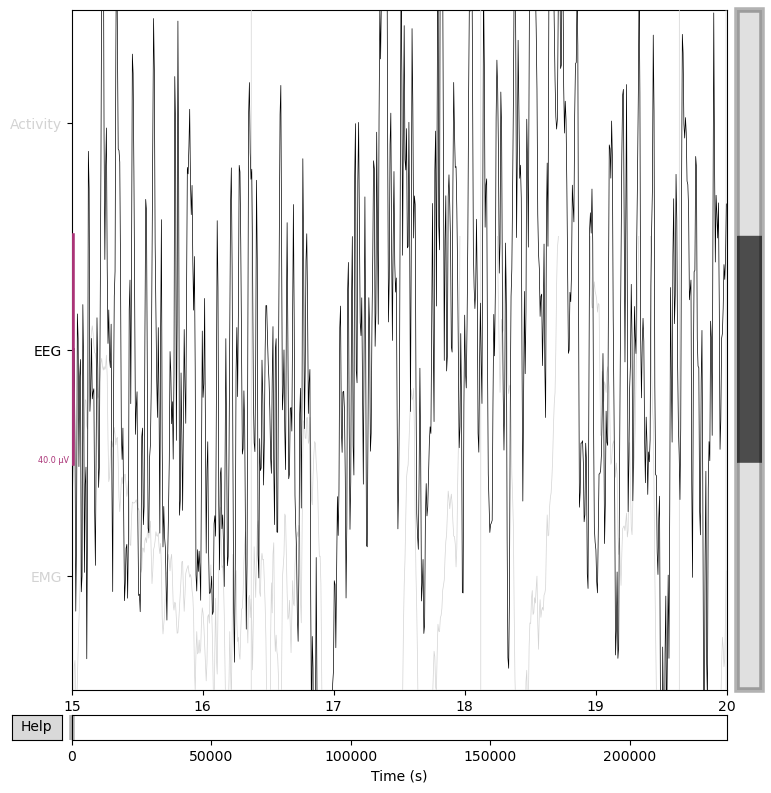

In [13]:
raw_filt.plot(start=15, duration=5);

In [14]:
raw.plot_psd(area_mode='range', tmax=10.0, picks='EEG', average=False);

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\avant\AppData\Local\Temp\ipykernel_15280\569070357.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(area_mode='range', tmax=10.0, picks='EEG', average=False);
C:\Users\avant\anaconda3\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


In [15]:
raw.crop(50.0, 110.0).load_data()  # crop for memory purposes
raw.resample(sfreq=250)

raw.pick_types(meg=False, eeg=True, ref_meg=False)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


<RawEDF | test_eeg.edf, 1 x 15000 (60.0 s), ~124 kB, data loaded>

Effective window size : 8.192 (s)
Aggregating Welch estimates (median) before plotting...
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\avant\AppData\Local\Temp\ipykernel_15280\4052747952.py:7: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  epochPs.plot()
C:\Users\avant\AppData\Local\Temp\ipykernel_15280\4052747952.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochPs.plot()
C:\Users\avant\anaconda3\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


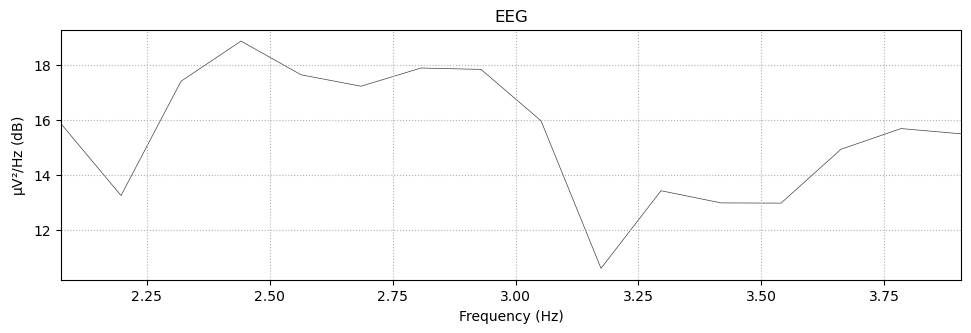

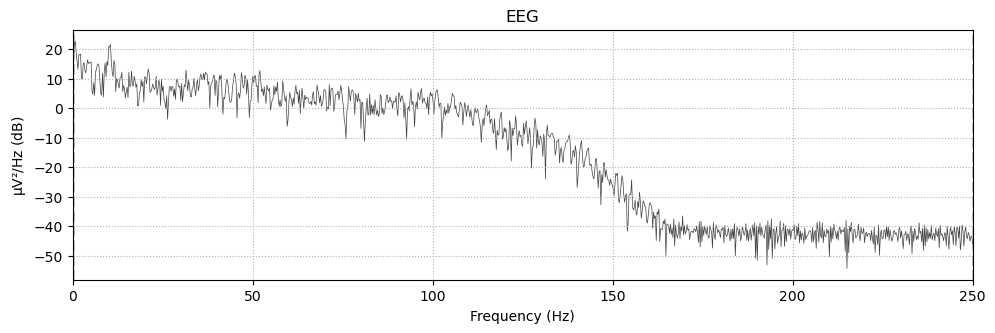

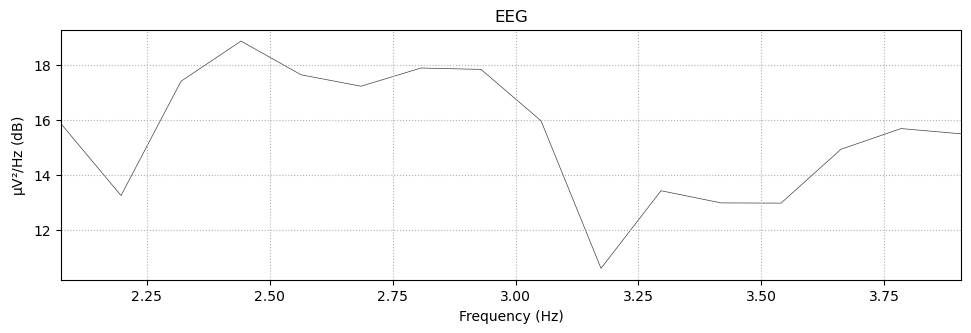

In [16]:
%matplotlib inline
EPOCH = 30.
FMIN = 2.
FMAX = 4.

epochPs = raw.compute_psd(method='welch', picks='EEG', fmin=FMIN, fmax=FMAX, average=False)
epochPs.plot()

In [24]:
type(epochPs)

mne.time_frequency.spectrum.Spectrum

In [25]:
print(epochPs.get_data())

[[[3.85027279e-11 2.54916207e-10 8.66656879e-11 5.33345140e-11
   2.10548303e-11 6.69391273e-12 4.52205035e-13]
  [9.61816970e-12 2.89870870e-10 2.94018809e-11 1.74016188e-11
   1.20583253e-11 2.11527956e-11 8.89800126e-11]
  [1.12895406e-10 1.37902718e-10 1.41991390e-11 1.49665677e-11
   1.12382660e-10 2.98095671e-11 5.49007545e-11]
  [1.93908922e-11 8.49382688e-11 6.36630961e-11 1.11665760e-10
   7.67590216e-11 3.05200550e-11 1.18859367e-10]
  [5.20452873e-11 5.79437695e-11 2.06704401e-10 3.06567591e-11
   1.07643441e-10 4.20385834e-11 2.32977113e-10]
  [3.47698963e-11 6.84515704e-11 1.68784249e-10 4.66958411e-11
   4.60781282e-11 5.26673014e-11 1.64805026e-10]
  [6.13107509e-11 1.47516416e-10 7.33333110e-11 6.23324240e-11
   2.66780655e-11 2.92901453e-11 4.30265269e-12]
  [1.58394553e-10 7.99412048e-11 6.06078944e-11 1.34756972e-11
   2.38611816e-11 3.47538875e-11 2.63811015e-10]
  [7.27177776e-11 1.15147633e-11 2.72321153e-11 3.58110443e-11
   1.09372458e-10 3.94676960e-11 1.618140

Effective window size : 8.192 (s)
Aggregating Welch estimates (median) before plotting...
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\avant\AppData\Local\Temp\ipykernel_20500\4279693563.py:7: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  epochPs.plot()
C:\Users\avant\AppData\Local\Temp\ipykernel_20500\4279693563.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochPs.plot()
C:\Users\avant\anaconda3\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


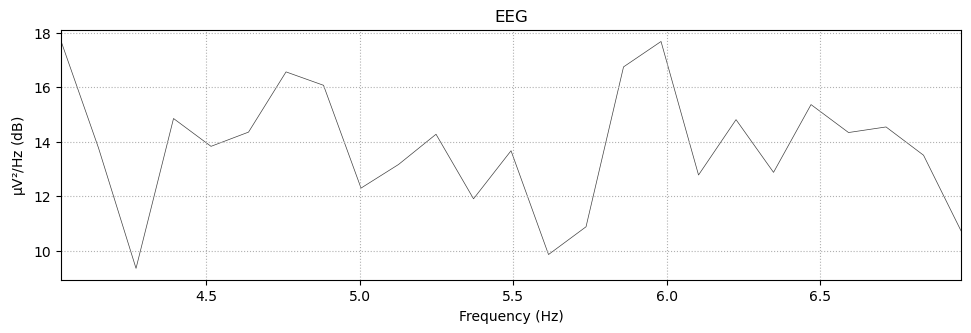

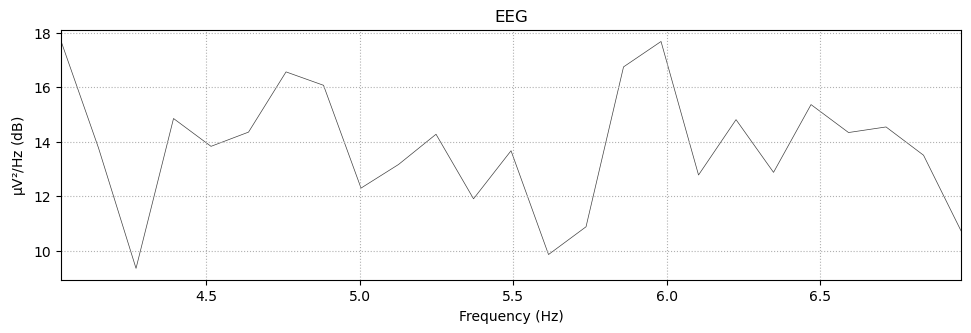

In [32]:
%matplotlib inline
EPOCH = 30.
FMIN = 4.
FMAX = 7.

epochPs = raw.compute_psd(method='welch', picks='EEG', fmin=FMIN, fmax=FMAX, average=False)
epochPs.plot()

Effective window size : 8.192 (s)
Aggregating Welch estimates (median) before plotting...
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\avant\AppData\Local\Temp\ipykernel_20500\3959529427.py:7: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  epochPs.plot()
C:\Users\avant\AppData\Local\Temp\ipykernel_20500\3959529427.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochPs.plot()
C:\Users\avant\anaconda3\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


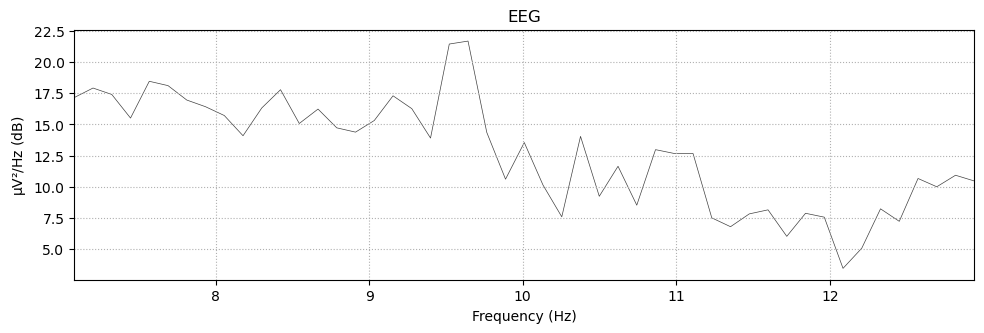

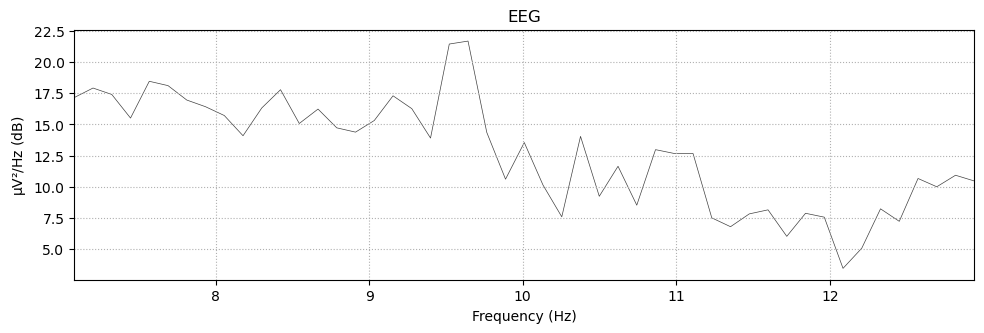

In [33]:
%matplotlib inline
EPOCH = 30.
FMIN = 7.
FMAX = 13.

epochPs = raw.compute_psd(method='welch', picks='EEG', fmin=FMIN, fmax=FMAX, average=False)
epochPs.plot()

Effective window size : 8.192 (s)
Aggregating Welch estimates (median) before plotting...
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\avant\AppData\Local\Temp\ipykernel_20500\897120954.py:7: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  epochPs.plot()
C:\Users\avant\AppData\Local\Temp\ipykernel_20500\897120954.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochPs.plot()
C:\Users\avant\anaconda3\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


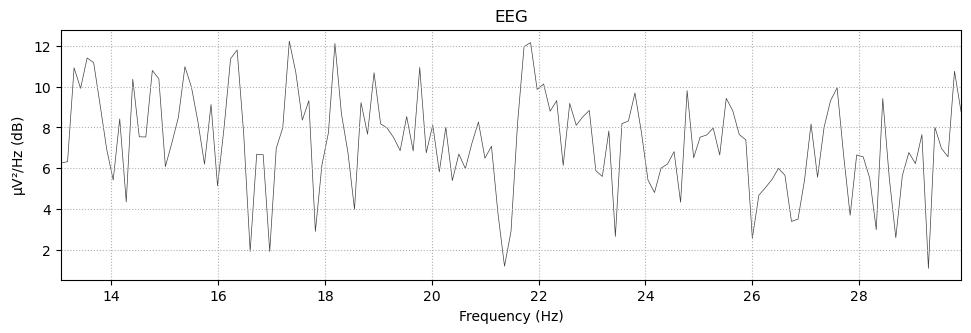

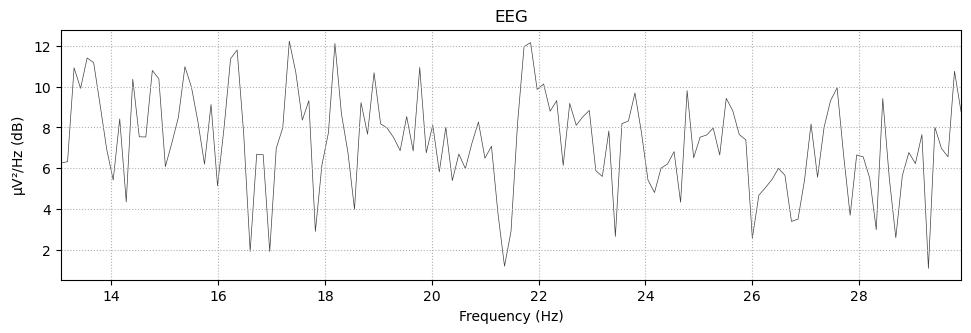

In [34]:
%matplotlib inline
EPOCH = 30.
FMIN = 13.
FMAX = 30.

epochPs = raw.compute_psd(method='welch', picks='EEG', fmin=FMIN, fmax=FMAX, average=False)
epochPs.plot()

Effective window size : 8.192 (s)
Aggregating Welch estimates (median) before plotting...
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\avant\AppData\Local\Temp\ipykernel_20500\586145300.py:7: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  epochPs.plot()
C:\Users\avant\AppData\Local\Temp\ipykernel_20500\586145300.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochPs.plot()
C:\Users\avant\anaconda3\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


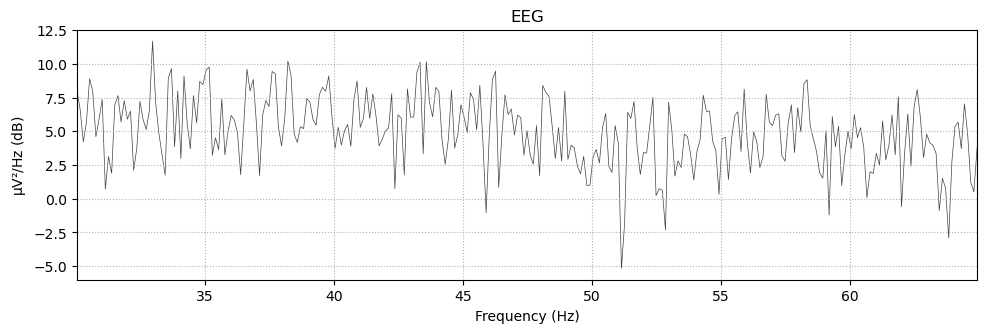

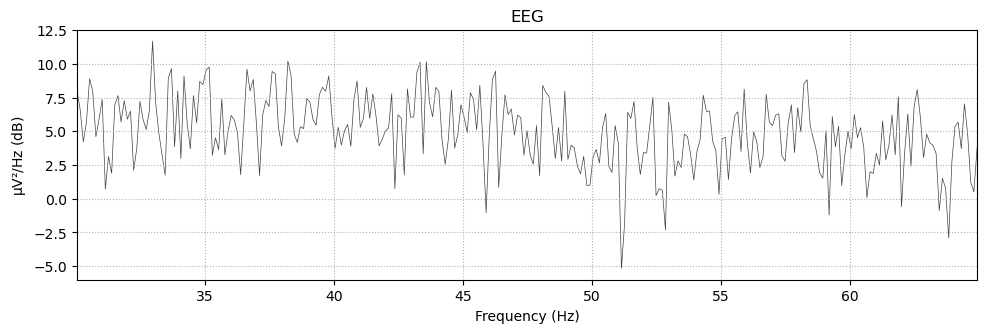

In [35]:
%matplotlib inline
EPOCH = 30.
FMIN = 30.
FMAX = 65.

epochPs = raw.compute_psd(method='welch', picks='EEG', fmin=FMIN, fmax=FMAX, average=False)
epochPs.plot()

Effective window size : 8.192 (s)
Aggregating Welch estimates (median) before plotting...
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\avant\AppData\Local\Temp\ipykernel_20500\1952323996.py:7: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  epochPs.plot()
C:\Users\avant\AppData\Local\Temp\ipykernel_20500\1952323996.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochPs.plot()
C:\Users\avant\anaconda3\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


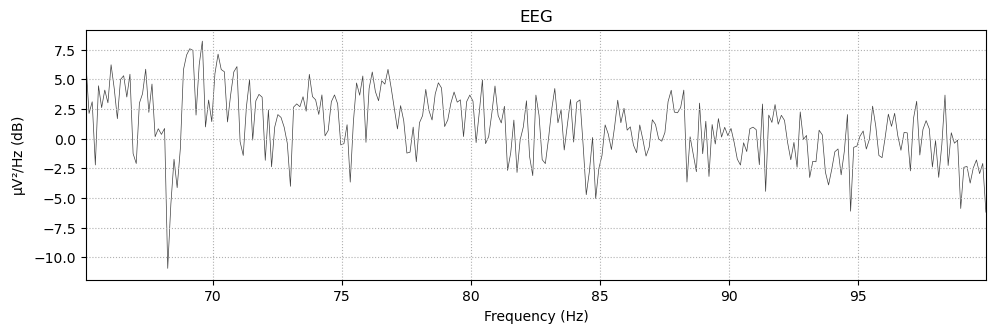

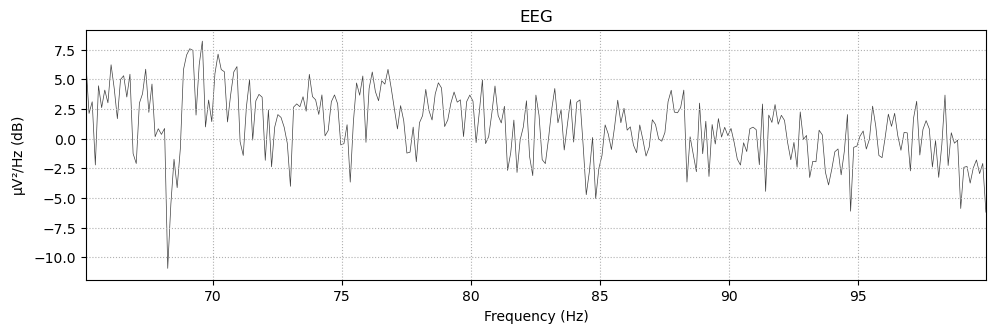

In [36]:
%matplotlib inline
EPOCH = 30.
FMIN = 65.
FMAX = 100.

epochPs = raw.compute_psd(method='welch', picks='EEG', fmin=FMIN, fmax=FMAX, average=False)
epochPs.plot()

In [17]:
from scipy import signal
raw = mne.io.read_raw(sample_data_raw_file)
eeg_pick=raw.pick_types(meg=False, eeg=True, ref_meg=False)
#see raw.info --> we see channels are Activity, EEG, EMG.
raw_data = raw.get_data(picks=['EEG'])
eeg_data_raw = raw_data[0]
eeg_data = eeg_data_raw[:180*500]

Extracting EDF parameters from C:\Users\avant\Downloads\test_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


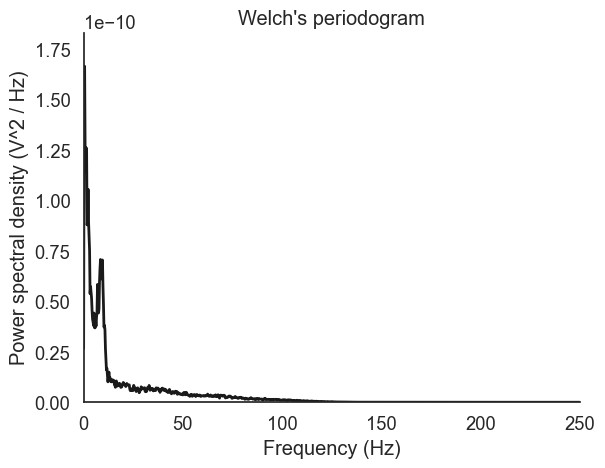

In [18]:
import seaborn as sns
sf= 500.
# Define window length (4 seconds)
win = 4 * sf
freqs, psd = signal.welch(eeg_data, sf, nperseg=win)
# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()

In [19]:
sr=1/sf

In [20]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = sr * 100



In [21]:
import math 
# Fourier transform
FourierCoeff = np.fft.fft(eeg_data)/eeg_data.size
DC = [np.abs(FourierCoeff[1])]
amp = np.concatenate((DC, 2*np.abs(FourierCoeff[1:])))  

# compute frequencies vector until half the sampling rate
Nyquist = sr/2
print('Nyquist frequency = %2.4f Hz'%Nyquist)
Nsamples = int(math.floor(eeg_data.size/2) )
hz = np.linspace(0, Nyquist, num = Nsamples + 1 )
dhz = hz[1]
print('Spectral resolution = %2.4f Hz'%hz[1])

Nyquist frequency = 0.0010 Hz
Spectral resolution = 0.0000 Hz


Text(0.5, 0, 'Frequency (Hz)')

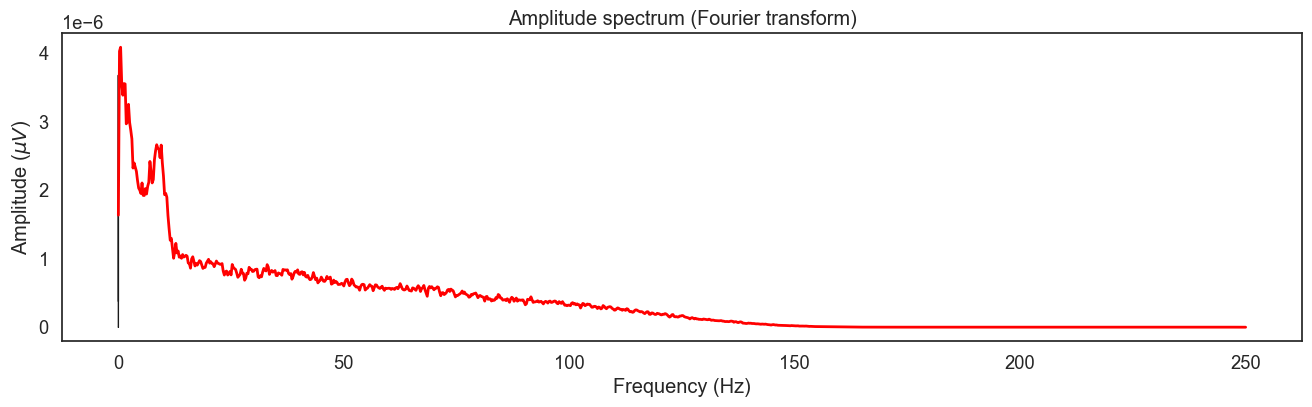

In [22]:
#plot fft
fig, ax = plt.subplots(1, 1, figsize=(16, 4))

ax.set_title("Amplitude spectrum (Fourier transform)")
ax.plot(hz, amp[:len(hz)], lw=1, color='k')  # Plot amplitude spectrum
ax.plot(freqs, np.sqrt(psd/10), color='red', lw=2)  # Plot power spectrum
ax.set_ylabel('Amplitude ($\mu V$)')
ax.set_xlabel('Frequency (Hz)') 

In [23]:
eeg_data.shape

(90000,)

In [24]:
from scipy.signal import welch

In [25]:
def extract_statistical_features(data):

    mean = np.mean(data)
    median = np.median(data)
    std = np.std(data)
    amplitude_variance = np.var(data)
    skewness = np.mean((data - mean) ** 3) / (std ** 3)  # Third standardized moment
    kurtosis = np.mean((data - mean) ** 4) / (std ** 4) - 3  # Fourth standardized moment (excess kurtosis)
    return [mean, median, std, amplitude_variance, skewness, kurtosis]

def compute_spectral_features(epoch, sample_rate=500):
   
    # Compute the FFT of the epoch
    fft_values = np.fft.fft(epoch)
    fft_magnitude = np.abs(fft_values)

    # Compute the Welch PSD of the epoch for 2-4 Hz band
    f, welch_psd = welch(epoch, fs=sample_rate, scaling='density')
    welch_psd_2_4hz = np.sum(welch_psd[(f >= 2) & (f <= 4)])

    # Combine the FFT magnitude and Welch PSD at 2-4 Hz into a feature vector
    epoch_features = np.concatenate((fft_magnitude, [welch_psd_2_4hz]))

    return epoch_features

def segment_to_epochs(eeg_data, epoch_duration=20, sample_rate=500): 
  
    epoch_samples = epoch_duration * sample_rate
    num_epochs = len(eeg_data) // epoch_samples
    epochs = [eeg_data[i * epoch_samples : (i + 1) * epoch_samples] for i in range(num_epochs)]
    
    # Calculate statistical features for each epoch
    statistical_features = [extract_statistical_features(epoch) for epoch in epochs]

    # Calculate spectral features for each epoch
    spectral_features = [compute_spectral_features(epoch, sample_rate) for epoch in epochs]

    # Calculate catch22 features for each epoch
    catch22_features= [pycatch22.catch22_all(epoch,catch24=True) for epoch in epochs]

    # Combine statistical, spectral, and catch22 features for each epoch
    features_list = [np.concatenate((stat_features, spec_features)) 
    for stat_features, spec_features, catch22_features 
    in zip(statistical_features, spectral_features, catch22_features)]

    return epochs, features_list

# Example usage:
# Assuming you have your EEG data as a numpy array named 'eeg_data' and it contains the time-series EEG data
# with a sample rate of 500 Hz.
# epochs_list will contain a list of numpy arrays, each representing a 20-second epoch.
# features_list will contain a list of numpy arrays, each representing the combined statistical and spectral features for the corresponding epoch.
epochs_list, features_list = segment_to_epochs(eeg_data, epoch_duration=20, sample_rate=500)

# Accessing the statistical and spectral features for the first epoch (epoch_index=0)
epoch_index = 0
statistical_features_of_epoch = features_list[epoch_index][:6]
spectral_features_of_epoch = features_list[epoch_index][6:12]
catch22_features = features_list[epoch_index][12:]

print("Statistical features of the specified epoch:", statistical_features_of_epoch)
print("Spectral features of the specified epoch:", spectral_features_of_epoch)
print("Catch24 features of specified epoch:", catch22_features)

Statistical features of the specified epoch: [-1.55053865e-06 -2.28888821e-06  3.31394969e-05  1.09822626e-09
  2.17958987e-02  7.47170118e-01]
Spectral features of the specified epoch: [0.01550539 0.01585825 0.0051251  0.03261598 0.01992445 0.04190227]
Catch24 features of specified epoch: [4.42414751e-03 3.44973203e-02 7.92202706e-03 ... 5.12509595e-03
 1.58582530e-02 4.35480511e-11]


In [26]:
def extract_statistical_features(data):
    
    mean = np.mean(data)
    median = np.median(data)
    std = np.std(data)
    amplitude_variance = np.var(data)
    skewness = np.mean((data - mean) ** 3) / (std ** 3)  # Third standardized moment
    kurtosis = np.mean((data - mean) ** 4) / (std ** 4) - 3  # Fourth standardized moment (excess kurtosis)
    return [mean, median, std, amplitude_variance, skewness, kurtosis]

def compute_spectral_features(epoch, sample_rate=500):
  
    # Compute the FFT of the epoch
    fft_values = np.fft.fft(epoch)
    fft_magnitude = np.abs(fft_values)

    # Compute the Welch PSD of the epoch for 4-7 Hz band
    f, welch_psd = welch(epoch, fs=sample_rate, scaling='density')
    welch_psd_4_7hz = np.sum(welch_psd[(f >= 4) & (f <= 7)])

    # Combine the FFT magnitude and Welch PSD at 4-7 Hz into a feature vector
    epoch_features = np.concatenate((fft_magnitude, [welch_psd_4_7hz]))

    return epoch_features

def segment_to_epochs(eeg_data, epoch_duration=20, sample_rate=500): 
    
    epoch_samples = epoch_duration * sample_rate
    num_epochs = len(eeg_data) // epoch_samples
    epochs = [eeg_data[i * epoch_samples : (i + 1) * epoch_samples] for i in range(num_epochs)]
    
    # Calculate statistical features for each epoch
    statistical_features = [extract_statistical_features(epoch) for epoch in epochs]

    # Calculate spectral features for each epoch
    spectral_features = [compute_spectral_features(epoch, sample_rate) for epoch in epochs]
    
    # Calculate catch22 features for each epoch
    catch22_features= [pycatch22.catch22_all(epoch,catch24=True) for epoch in epochs]

    # Combine statistical, spectral, and catch22 features for each epoch
    features_list = [np.concatenate((stat_features, spec_features)) 
    for stat_features, spec_features, catch22_features 
    in zip(statistical_features, spectral_features, catch22_features)]
    
    
   
    return epochs, features_list

epochs_list, features_list = segment_to_epochs(eeg_data, epoch_duration=20, sample_rate=500)

# Accessing the statistical and spectral features for the second epoch (epoch_index=1)
epoch_index = 1
statistical_features_of_epoch = features_list[epoch_index][:6]
spectral_features_of_epoch = features_list[epoch_index][6:12]
catch22_features = features_list[epoch_index][12:]

print("Statistical features of the specified epoch:", statistical_features_of_epoch)
print("Spectral features of the specified epoch:", spectral_features_of_epoch)
print("Catch24 features of specified epoch:", catch22_features)


Statistical features of the specified epoch: [-2.74666585e-09  1.52592547e-07  3.45898699e-05  1.19645910e-09
  3.65409549e-02 -4.51689521e-02]
Spectral features of the specified epoch: [2.74666585e-05 4.50135387e-04 1.18584000e-02 2.82582858e-02
 1.72242164e-02 2.18768525e-02]
Catch24 features of specified epoch: [5.19443906e-03 3.72665358e-02 1.90939034e-02 ... 1.18584000e-02
 4.50135387e-04 4.70694789e-11]


In [27]:
catch22_features.shape


(9995,)

In [28]:
def extract_statistical_features(data):

    mean = np.mean(data)
    median = np.median(data)
    std = np.std(data)
    amplitude_variance = np.var(data)
    skewness = np.mean((data - mean) ** 3) / (std ** 3)  # Third standardized moment
    kurtosis = np.mean((data - mean) ** 4) / (std ** 4) - 3  # Fourth standardized moment (excess kurtosis)
    return [mean, median, std, amplitude_variance, skewness, kurtosis]

def compute_spectral_features(epoch, sample_rate=500):
  
    # Compute the FFT of the epoch
    fft_values = np.fft.fft(epoch)
    fft_magnitude = np.abs(fft_values)

    # Compute the Welch PSD of the epoch for 7-13 Hz band
    f, welch_psd = welch(epoch, fs=sample_rate, scaling='density')
    welch_psd_7_13hz = np.sum(welch_psd[(f >= 7) & (f <= 13)])

    # Combine the FFT magnitude and Welch PSD at 7-13 Hz into a feature vector
    epoch_features = np.concatenate((fft_magnitude, [welch_psd_7_13hz]))

    return epoch_features

def segment_to_epochs(eeg_data, epoch_duration=20, sample_rate=500): 
  
    epoch_samples = epoch_duration * sample_rate
    num_epochs = len(eeg_data) // epoch_samples
    epochs = [eeg_data[i * epoch_samples : (i + 1) * epoch_samples] for i in range(num_epochs)]
    
    # Calculate statistical features for each epoch
    statistical_features = [extract_statistical_features(epoch) for epoch in epochs]

    # Calculate spectral features for each epoch
    spectral_features = [compute_spectral_features(epoch, sample_rate) for epoch in epochs]

     # Calculate catch22 features for each epoch
    catch22_features= [pycatch22.catch22_all(epoch,catch24=True) for epoch in epochs]

    # Combine statistical, spectral, and catch22 features for each epoch
    features_list = [np.concatenate((stat_features, spec_features)) 
    for stat_features, spec_features, catch22_features 
    in zip(statistical_features, spectral_features, catch22_features)]

    return epochs, features_list


epochs_list, features_list = segment_to_epochs(eeg_data, epoch_duration=20, sample_rate=500)

# Accessing the statistical and spectral features for the third epoch (epoch_index=2)
epoch_index = 2
statistical_features_of_epoch = features_list[epoch_index][:6]
spectral_features_of_epoch = features_list[epoch_index][6:12]
catch22_features = features_list[epoch_index][12:]

print("Statistical features of the specified epoch:", statistical_features_of_epoch)
print("Spectral features of the specified epoch:", spectral_features_of_epoch)
print("Catch24 features of specified epoch:", catch22_features)

Statistical features of the specified epoch: [ 2.18665120e-07 -1.52592547e-07  3.29994921e-05  1.08896648e-09
  7.23206499e-02 -9.76781637e-02]
Spectral features of the specified epoch: [0.00218665 0.01441238 0.01944474 0.01228373 0.01427849 0.00207995]
Catch24 features of specified epoch: [1.57639956e-02 2.66205795e-02 1.86458165e-02 ... 1.94447432e-02
 1.44123832e-02 1.42031233e-10]


In [29]:
def extract_statistical_features(data):
  
    mean = np.mean(data)
    median = np.median(data)
    std = np.std(data)
    amplitude_variance = np.var(data)
    skewness = np.mean((data - mean) ** 3) / (std ** 3)  # Third standardized moment
    kurtosis = np.mean((data - mean) ** 4) / (std ** 4) - 3  # Fourth standardized moment (excess kurtosis)
    return [mean, median, std, amplitude_variance, skewness, kurtosis]

def compute_spectral_features(epoch, sample_rate=500):
 
    # Compute the FFT of the epoch
    fft_values = np.fft.fft(epoch)
    fft_magnitude = np.abs(fft_values)

    # Compute the Welch PSD of the epoch for 13-30 Hz band
    f, welch_psd = welch(epoch, fs=sample_rate, scaling='density')
    welch_psd_13_30hz = np.sum(welch_psd[(f >= 13) & (f <= 30)]) 

    # Combine the FFT magnitude and Welch PSD at 13-30 Hz into a feature vector
    epoch_features = np.concatenate((fft_magnitude, [welch_psd_13_30hz]))

    return epoch_features

def segment_to_epochs(eeg_data, epoch_duration=20, sample_rate=500): 
 
    epoch_samples = epoch_duration * sample_rate
    num_epochs = len(eeg_data) // epoch_samples
    epochs = [eeg_data[i * epoch_samples : (i + 1) * epoch_samples] for i in range(num_epochs)]
    
    # Calculate statistical features for each epoch
    statistical_features = [extract_statistical_features(epoch) for epoch in epochs]

    # Calculate spectral features for each epoch
    spectral_features = [compute_spectral_features(epoch, sample_rate) for epoch in epochs]

    # Calculate catch22 features for each epoch
    catch22_features= [pycatch22.catch22_all(epoch,catch24=True) for epoch in epochs]

    # Combine statistical, spectral, and catch22 features for each epoch
    features_list = [np.concatenate((stat_features, spec_features)) 
    for stat_features, spec_features, catch22_features 
    in zip(statistical_features, spectral_features, catch22_features)]

    return epochs, features_list


epochs_list, features_list = segment_to_epochs(eeg_data, epoch_duration=20, sample_rate=500)

# Accessing the statistical and spectral features for the fourth epoch (epoch_index=3)
epoch_index = 3
statistical_features_of_epoch = features_list[epoch_index][:6]
spectral_features_of_epoch = features_list[epoch_index][6:12]
catch22_features = features_list[epoch_index][12:]

print("Statistical features of the specified epoch:", statistical_features_of_epoch)
print("Spectral features of the specified epoch:", spectral_features_of_epoch)
print("Catch24 features of specified epoch:", catch22_features)

Statistical features of the specified epoch: [ 3.03964354e-08 -1.06814783e-06  3.56066866e-05  1.26783613e-09
  1.21678391e-01  2.03492812e-01]
Spectral features of the specified epoch: [0.00030396 0.03430247 0.02934295 0.03285645 0.03852131 0.03256705]
Catch24 features of specified epoch: [4.06768858e-02 2.39187290e-02 2.53760767e-02 ... 2.93429491e-02
 3.43024673e-02 8.27064390e-11]


In [30]:
def extract_statistical_features(data):
  
    mean = np.mean(data)
    median = np.median(data)
    std = np.std(data)
    amplitude_variance = np.var(data)
    skewness = np.mean((data - mean) ** 3) / (std ** 3)  # Third standardized moment
    kurtosis = np.mean((data - mean) ** 4) / (std ** 4) - 3  # Fourth standardized moment (excess kurtosis)
    return [mean, median, std, amplitude_variance, skewness, kurtosis]

def compute_spectral_features(epoch, sample_rate=500):
 
    # Compute the FFT of the epoch
    fft_values = np.fft.fft(epoch)
    fft_magnitude = np.abs(fft_values)

    # Compute the Welch PSD of the epoch for 30-55 Hz band
    f, welch_psd = welch(epoch, fs=sample_rate, scaling='density')
    welch_psd_30_55hz = np.sum(welch_psd[(f >= 30) & (f <= 55)])

    # Combine the FFT magnitude and Welch PSD at 30-55 Hz into a feature vector
    epoch_features = np.concatenate((fft_magnitude, [welch_psd_30_55hz]))

    return epoch_features

def segment_to_epochs(eeg_data, epoch_duration=20, sample_rate=500): 
 
    epoch_samples = epoch_duration * sample_rate
    num_epochs = len(eeg_data) // epoch_samples
    epochs = [eeg_data[i * epoch_samples : (i + 1) * epoch_samples] for i in range(num_epochs)]
    
    # Calculate statistical features for each epoch
    statistical_features = [extract_statistical_features(epoch) for epoch in epochs]

    # Calculate spectral features for each epoch
    spectral_features = [compute_spectral_features(epoch, sample_rate) for epoch in epochs]

    # Calculate catch22 features for each epoch
    catch22_features= [pycatch22.catch22_all(epoch,catch24=True) for epoch in epochs]

    # Combine statistical, spectral, and catch22 features for each epoch
    features_list = [np.concatenate((stat_features, spec_features)) 
    for stat_features, spec_features, catch22_features 
    in zip(statistical_features, spectral_features, catch22_features)]
    return epochs, features_list


epochs_list, features_list = segment_to_epochs(eeg_data, epoch_duration=20, sample_rate=500)

# Accessing the statistical and spectral features for the fifth epoch (epoch_index=4)
epoch_index = 4
statistical_features_of_epoch = features_list[epoch_index][:6]
spectral_features_of_epoch = features_list[epoch_index][6:12]
catch22_features = features_list[epoch_index][12:]

print("Statistical features of the specified epoch:", statistical_features_of_epoch)
print("Spectral features of the specified epoch:", spectral_features_of_epoch)
print("Catch24 features of specified epoch:", catch22_features)

Statistical features of the specified epoch: [ 9.53474532e-07  3.05185095e-07  3.14176755e-05  9.87070334e-10
  3.19404391e-02 -6.76552146e-02]
Spectral features of the specified epoch: [0.00953475 0.01095767 0.00942406 0.01051862 0.01198895 0.00758401]
Catch24 features of specified epoch: [1.05264128e-02 3.34360342e-02 6.87644254e-03 ... 9.42406033e-03
 1.09576676e-02 7.36768819e-11]


In [31]:
def extract_statistical_features(data):
  
    mean = np.mean(data)
    median = np.median(data)
    std = np.std(data)
    amplitude_variance = np.var(data)
    skewness = np.mean((data - mean) ** 3) / (std ** 3)  # Third standardized moment
    kurtosis = np.mean((data - mean) ** 4) / (std ** 4) - 3  # Fourth standardized moment (excess kurtosis)
    return [mean, median, std, amplitude_variance, skewness, kurtosis]

def compute_spectral_features(epoch, sample_rate=500):
 
    # Compute the FFT of the epoch
    fft_values = np.fft.fft(epoch)
    fft_magnitude = np.abs(fft_values)

    # Compute the Welch PSD of the epoch for 65-100 Hz band
    f, welch_psd = welch(epoch, fs=sample_rate, scaling='density')
    welch_psd_65_100hz = np.sum(welch_psd[(f >= 65) & (f <= 100)])

    # Combine the FFT magnitude and Welch PSD at 65-100 Hz into a feature vector
    epoch_features = np.concatenate((fft_magnitude, [welch_psd_65_100hz]))

    return epoch_features

def segment_to_epochs(eeg_data, epoch_duration=20, sample_rate=500): 
 
    epoch_samples = epoch_duration * sample_rate
    num_epochs = len(eeg_data) // epoch_samples
    epochs = [eeg_data[i * epoch_samples : (i + 1) * epoch_samples] for i in range(num_epochs)]
    
    # Calculate statistical features for each epoch
    statistical_features = [extract_statistical_features(epoch) for epoch in epochs]

    # Calculate spectral features for each epoch
    spectral_features = [compute_spectral_features(epoch, sample_rate) for epoch in epochs]

    # Calculate catch22 features for each epoch
    catch22_features= [pycatch22.catch22_all(epoch,catch24=True) for epoch in epochs]

    # Combine statistical, spectral, and catch22 features for each epoch
    features_list = [np.concatenate((stat_features, spec_features)) 
    for stat_features, spec_features, catch22_features 
    in zip(statistical_features, spectral_features, catch22_features)]

    return epochs, features_list


epochs_list, features_list = segment_to_epochs(eeg_data, epoch_duration=20, sample_rate=500)

# Accessing the statistical and spectral features for the sixth epoch (epoch_index=5)
epoch_index = 5
statistical_features_of_epoch = features_list[epoch_index-1][:6]
spectral_features_of_epoch = features_list[epoch_index-1][6:12]
catch22_features = features_list[epoch_index-1][12:]

print("Statistical features of the specified epoch:", statistical_features_of_epoch)
print("Spectral features of the specified epoch:", spectral_features_of_epoch)
print("Catch24 features of specified epoch:", catch22_features)

Statistical features of the specified epoch: [ 9.53474532e-07  3.05185095e-07  3.14176755e-05  9.87070334e-10
  3.19404391e-02 -6.76552146e-02]
Spectral features of the specified epoch: [0.00953475 0.01095767 0.00942406 0.01051862 0.01198895 0.00758401]
Catch24 features of specified epoch: [1.05264128e-02 3.34360342e-02 6.87644254e-03 ... 9.42406033e-03
 1.09576676e-02 3.23701508e-11]


In [32]:
len(features_list)

9

In [33]:
def compute_spectral_features(epoch, sample_rate=500):
    # ... (existing code for FFT calculation)

    # Compute the Welch PSD of the epoch for 2-4 Hz band
    f, welch_psd = welch(epoch, fs=sample_rate, scaling='density')
    welch_psd_2_4hz = np.sum(welch_psd[(f >= 2) & (f <= 4)])

    # Compute the Welch PSD of the epoch for 4-7 Hz band
    welch_psd_4_7hz = np.sum(welch_psd[(f >= 4) & (f <= 7)])

    # Compute the Welch PSD of the epoch for 7-13 Hz band
    welch_psd_7_13hz = np.sum(welch_psd[(f >= 7) & (f <= 13)])

    # Compute the Welch PSD of the epoch for 13-30 Hz band
    welch_psd_13_30hz = np.sum(welch_psd[(f >= 13) & (f <= 30)])

    # Compute the Welch PSD of the epoch for 30-55 Hz band
    welch_psd_30_55hz = np.sum(welch_psd[(f >= 30) & (f <= 55)])

    # Compute the Welch PSD of the epoch for 65-100 Hz band
    welch_psd_65_100hz = np.sum(welch_psd[(f >= 65) & (f <= 100)])

    # Return the Welch PSD values for all frequency bands as a list
    return [welch_psd_2_4hz, welch_psd_4_7hz, welch_psd_7_13hz, welch_psd_13_30hz, welch_psd_30_55hz, welch_psd_65_100hz]


In [34]:
import pandas as pd

# Assuming you have already called segment_to_epochs to obtain epochs_list and features_list

# Create a DataFrame for Welch PSD values
welch_psd_columns = ['welch_psd_2_4hz', 'welch_psd_4_7hz', 'welch_psd_7_13hz', 'welch_psd_13_30hz', 'welch_psd_30_55hz', 'welch_psd_65_100hz']
welch_psd_dataframe = pd.DataFrame([epoch[6:12] for epoch in features_list], columns=welch_psd_columns)

# Print the DataFrame
print(welch_psd_dataframe)


   welch_psd_2_4hz  welch_psd_4_7hz  welch_psd_7_13hz  welch_psd_13_30hz  \
0         0.015505         0.015858          0.005125           0.032616   
1         0.000027         0.000450          0.011858           0.028258   
2         0.002187         0.014412          0.019445           0.012284   
3         0.000304         0.034302          0.029343           0.032856   
4         0.009535         0.010958          0.009424           0.010519   
5         0.014002         0.003153          0.005966           0.017743   
6         0.021973         0.011567          0.010265           0.002300   
7         0.016341         0.007296          0.013499           0.019779   
8         0.002881         0.012013          0.010456           0.014404   

   welch_psd_30_55hz  welch_psd_65_100hz  
0           0.019924            0.041902  
1           0.017224            0.021877  
2           0.014278            0.002080  
3           0.038521            0.032567  
4           0.011989    

In [47]:
# Specify the path where you want to save the CSV file
"C:\\Users\\avant\\OneDrive" == "welch1.csv"

# Save the DataFrame to a CSV file
welch_psd_dataframe.to_csv("C:\\Users\\avant\\OneDrive\\welch1.csv", index=False)

# Print a message to confirm that the DataFrame has been saved
print(f"DataFrame saved to {{C:\\Users\\avant\\OneDrive\\welch1.csv}}")

DataFrame saved to {C:\Users\avant\OneDrive\welch1.csv}


In [39]:
epochs_list, features_list = segment_to_epochs(eeg_data)

# Concatenate the statistical and spectral features for all epochs into a single 2D array
all_features = np.vstack(features_list)

# Create a list of column names for the DataFrame
# The column names will be: ['mean', 'median', 'std', 'amplitude_variance', 'skewness', 'kurtosis', 'fft_0', 'fft_1', ...,'fft_n-1']
# 'fft_0', 'fft_1', 'fft_2' are the FFT values for different frequencies, and 'welch_psd' is the Welch PSD at 2-4 Hz
column_names = ['mean', 'median', 'std', 'amplitude_variance', 'skewness', 'kurtosis']
column_names += [f'fft_{i}' for i in range(all_features.shape[1] - 7)]  # Add FFT column names
column_names += ['welch_psd_2_4hz']  # Add Welch PSD column name

# Create a DataFrame from the 'all_features' array with the column names
epoch_dataframe = pd.DataFrame(all_features, columns=column_names)

# Print the DataFrame
print(epoch_dataframe)

           mean        median       std  amplitude_variance  skewness  \
0 -1.550539e-06 -2.288888e-06  0.000033        1.098226e-09  0.021796   
1 -2.746666e-09  1.525925e-07  0.000035        1.196459e-09  0.036541   
2  2.186651e-07 -1.525925e-07  0.000033        1.088966e-09  0.072321   
3  3.039644e-08 -1.068148e-06  0.000036        1.267836e-09  0.121678   
4  9.534745e-07  3.051851e-07  0.000031        9.870703e-10  0.031940   
5 -1.400159e-06 -2.441481e-06  0.000036        1.280211e-09  0.155254   
6  2.197317e-06  1.831111e-06  0.000035        1.210460e-09  0.012662   
7 -1.634144e-06 -2.746666e-06  0.000037        1.357576e-09  0.204879   
8 -2.880947e-07 -7.629627e-07  0.000034        1.127507e-09  0.032875   

   kurtosis         fft_0         fft_1         fft_2         fft_3  \
0  0.747170  4.354805e-11  2.797367e-11  1.162479e-10  6.517928e-11   
1 -0.045169  5.947289e-11  4.706948e-11  1.471863e-10  8.097583e-11   
2 -0.097678  5.224240e-11  3.859500e-11  1.420312e-10  6

In [40]:
# Specify the path where you want to save the CSV file
"C:\\Users\\avant\\OneDrive" == "epoch_features.csv"

# Save the DataFrame to a CSV file
epoch_dataframe.to_csv("C:\\Users\\avant\\OneDrive\\epoch_features.csv", index=False)

# Print a message to confirm that the DataFrame has been saved
print(f"DataFrame saved to {{C:\\Users\\avant\\OneDrive\\epoch_features.csv}}")

DataFrame saved to {C:\Users\avant\OneDrive\epoch_features.csv}


In [41]:
average_mean_value = np.mean(epoch_dataframe['mean'])

print("Average of all mean values for all epochs:", average_mean_value)

Average of all mean values for all epochs: -1.6398103783277904e-07


In [42]:
average_median_value = np.mean(epoch_dataframe['median'])
print("Average of all median values for all epochs:", average_median_value)

Average of all median values for all epochs: -7.9687219187326e-07


In [43]:
average_std_value = np.mean(epoch_dataframe['std'])
print("Average of all Standard deviation values for all epochs:", average_std_value)
average_amplitude_variance_value = np.mean(epoch_dataframe['amplitude_variance'])
print("Average of all amplitude/variance values for all epochs:", average_amplitude_variance_value)

Average of all Standard deviation values for all epochs: 3.4305398723547415e-05
Average of all amplitude/variance values for all epochs: 1.179368004046852e-09


In [56]:
average_skewness_value = np.mean(epoch_dataframe['skewness'])
print("Average of all Skewness values for all epochs:", average_skewness_value)
average_kurtosis_value = np.mean(epoch_dataframe['kurtosis'])
print("Average of all kurtosis values for all epochs:", average_kurtosis_value)

Average of all Skewness values for all epochs: -0.02152240201017208
Average of all kurtosis values for all epochs: 5.095140780221239


In [44]:
# Define the targeted frequencies above the threshold
threshold = 2  # Set your threshold frequency here (in Hz)
targeted_frequencies = [f for f in epoch_dataframe.columns if f.startswith('fft_') and int(f.split('_')[1]) > threshold]

# Calculate the average of the FFT values for the targeted frequencies
average_fft_values = np.mean(epoch_dataframe[targeted_frequencies], axis=1)

print("Average of FFT values for targeted frequencies above", threshold, "Hz:")
print(average_fft_values)

Average of FFT values for targeted frequencies above 2 Hz:
0    7.242141e-11
1    7.336716e-11
2    6.439449e-11
3    7.458283e-11
4    7.489422e-11
5    6.831681e-11
6    7.056513e-11
7    7.524807e-11
8    6.735585e-11
dtype: float64


In [45]:
def compute_welch_psd(epoch, sample_rate=500):
    f, welch_psd = welch(epoch, fs=sample_rate, scaling='density')
    return welch_psd

# Calculate the Welch PSD values for all epochs
psd_values_list = [compute_welch_psd(epoch, sample_rate=500) for epoch in epochs_list]

# Concatenate the PSD values for all epochs into a single 2D array
all_psd_values = np.vstack(psd_values_list)

# Create a DataFrame from the 'all_features' array with the column names
epoch_dataframe = pd.DataFrame(all_features, columns=column_names)

# Calculate the average of all PSD values for all frequencies
average_psd_values = np.mean(all_psd_values, axis=0)

print("Average of all PSD values for all frequencies:")
print(average_psd_values)

Average of all PSD values for all frequencies:
[1.45807711e-11 7.65687582e-11 5.98857206e-11 4.49562574e-11
 5.54001331e-11 4.94240316e-11 2.16465067e-11 1.16857484e-11
 9.81639272e-12 8.84113698e-12 8.58041279e-12 8.50574947e-12
 7.43534165e-12 6.52320738e-12 6.20928946e-12 6.45258320e-12
 6.42279077e-12 6.75310090e-12 6.42420142e-12 6.45467709e-12
 6.38077657e-12 5.92081539e-12 5.05640490e-12 4.86015878e-12
 4.58977144e-12 4.15535190e-12 4.11192632e-12 3.75739121e-12
 3.53965056e-12 3.47585283e-12 3.27769524e-12 3.22072526e-12
 3.24770439e-12 3.09803544e-12 3.13123964e-12 3.21951611e-12
 3.11285199e-12 2.68796133e-12 2.53497613e-12 2.34194024e-12
 2.23788626e-12 2.08011074e-12 1.80196997e-12 1.72137545e-12
 1.69017300e-12 1.67279075e-12 1.57922180e-12 1.50822712e-12
 1.36634012e-12 1.39111135e-12 1.28378050e-12 1.10849691e-12
 1.07229450e-12 1.02534884e-12 9.13208577e-13 8.68366543e-13
 7.80941978e-13 6.75811540e-13 6.02628807e-13 5.26586045e-13
 4.49801125e-13 3.77495839e-13 3.52102

In [46]:
pycatch22.catch22_all(eeg_data,catch24=True)

{'names': ['DN_HistogramMode_5',
  'DN_HistogramMode_10',
  'CO_f1ecac',
  'CO_FirstMin_ac',
  'CO_HistogramAMI_even_2_5',
  'CO_trev_1_num',
  'MD_hrv_classic_pnn40',
  'SB_BinaryStats_mean_longstretch1',
  'SB_TransitionMatrix_3ac_sumdiagcov',
  'PD_PeriodicityWang_th0_01',
  'CO_Embed2_Dist_tau_d_expfit_meandiff',
  'IN_AutoMutualInfoStats_40_gaussian_fmmi',
  'FC_LocalSimple_mean1_tauresrat',
  'DN_OutlierInclude_p_001_mdrmd',
  'DN_OutlierInclude_n_001_mdrmd',
  'SP_Summaries_welch_rect_area_5_1',
  'SB_BinaryStats_diff_longstretch0',
  'SB_MotifThree_quantile_hh',
  'SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1',
  'SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1',
  'SP_Summaries_welch_rect_centroid',
  'FC_LocalSimple_mean3_stderr',
  'DN_Mean',
  'DN_Spread_Std'],
 'values': [-0.8389529919598151,
  -0.22658621648396915,
  13.060745112396212,
  33,
  0.18736416515987933,
  0.0015486393926977286,
  0.9069767441860465,
  170.0,
  0.0001258704682556936,
  51,
  0.2258034416777502,
  32.0,
 